In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [597]:

data = pd.read_excel(r"C:\Users\ranja\Desktop\ML Notes\Projects\Laptop Price Predictor\LaptopPrices.xlsx")


In [598]:
data.head()

,Column1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [599]:
# row index occurs two times so
data = data.drop('Column1', axis=1)

In [600]:
data.duplicated().sum()

29

In [601]:
# data = data.drop(data.index[0])
# data = data.reset_index(drop=True)

In [602]:
data.shape

(1303, 11)

In [603]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [604]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [605]:

# drop duplicates
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.shape


(1274, 11)

In [606]:
data.duplicated().sum()

0

In [607]:
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Ram'] = data['Ram'].astype(int)

In [608]:
data['Weight'] = data['Weight'].str.replace('kg', '')
data['Weight'] = data['Weight'].astype(float)


In [609]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

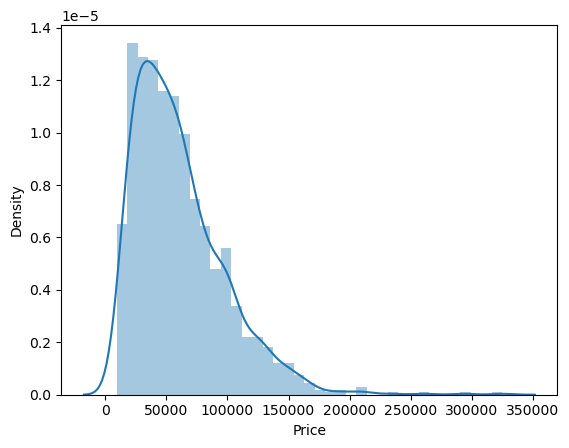

In [610]:
sns.distplot(data['Price'])

The price data is skewed

<Axes: >

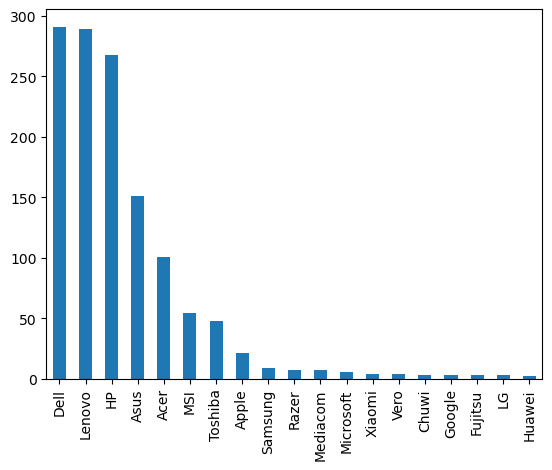

In [611]:
data['Company'].value_counts().plot(kind='bar')

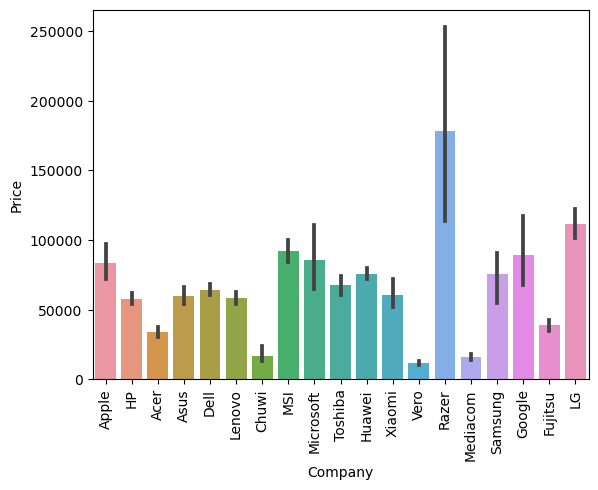

In [612]:
sns.barplot(x='Company', y='Price', data=data)
plt.xticks(rotation='vertical')
plt.show()

Shows price depends on the Company name

<Axes: >

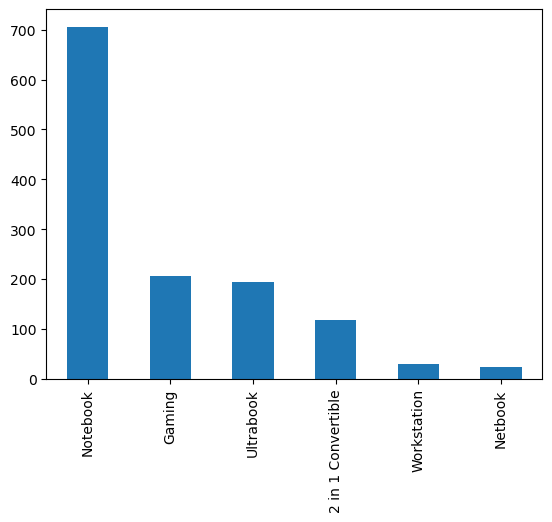

In [613]:
data['TypeName'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

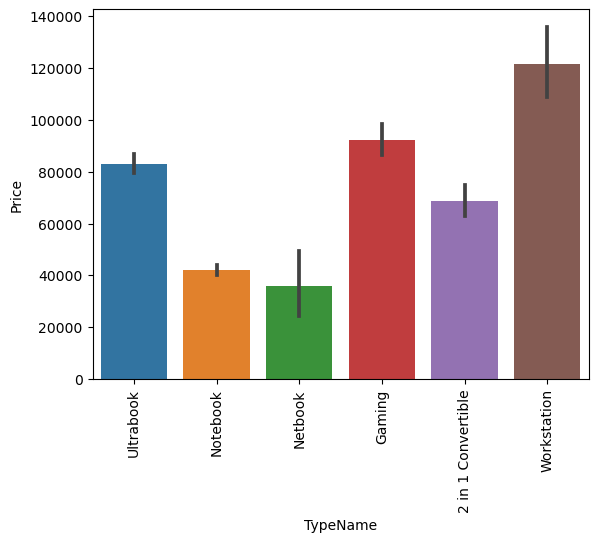

In [614]:
sns.barplot(y = data['Price'],x = data['TypeName'])
plt.xticks(rotation='vertical')

<Axes: >

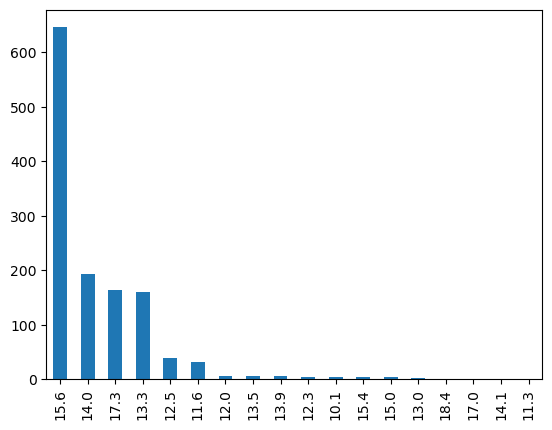

In [615]:
data['Inches'].value_counts().plot(kind='bar')

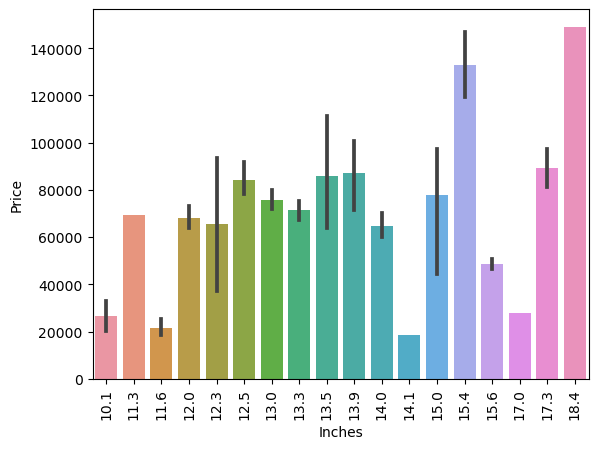

In [616]:
sns.barplot(y = data['Price'],x = data['Inches'])
plt.xticks(rotation='vertical')
plt.show()

In [617]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

Looking at the values we can take features 'IPS' , 'Touchscreen' and Resolution

In [618]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'touchscreen' in x.lower() else 0)

In [619]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1232,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24988.8528,1
356,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,No OS,2.20,17155.6272,0
1100,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.50,60480.7920,0
45,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8,256GB SSD,Intel Iris Graphics 540,macOS,1.37,75604.3200,0
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.8000,1


<Axes: >

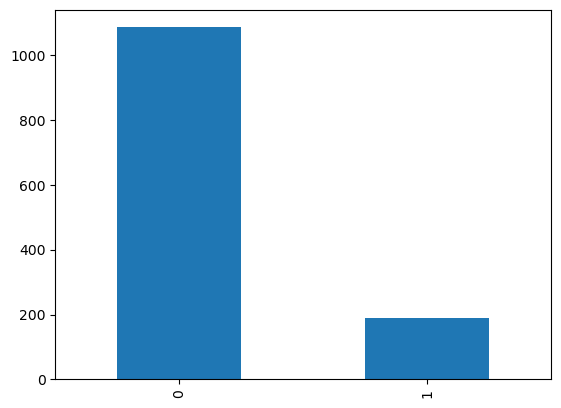

In [620]:
data['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

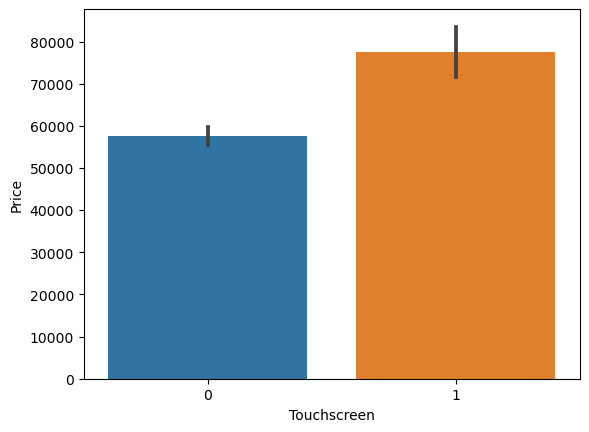

In [621]:
sns.barplot(y = data['Price'],x = data['Touchscreen'])

In general Touchscreen ones are more expensive

In [622]:
data['IPS'] = data['ScreenResolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0)


In [623]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

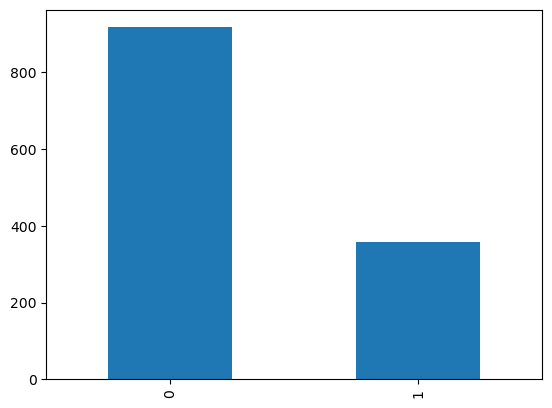

In [624]:
data['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

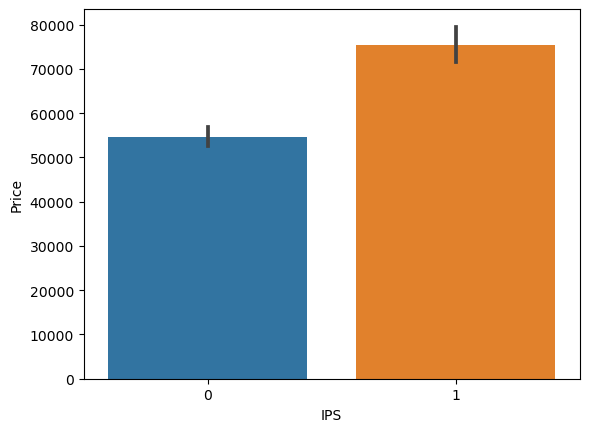

In [625]:
sns.barplot(y = data['Price'],x = data['IPS'])

In [626]:
# code to extract resolution from screen resolution column
data['Y_res'] = data['ScreenResolution'].str.split('x').str[1]
data['Y_res'] = data['Y_res'].astype(int)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600


In [627]:
import re

In [628]:
data['X_res'] = data['ScreenResolution'].str.split('x').str[0].apply(lambda x: re.findall(r'\d{3,4}', x)[0]).astype(int)

In [629]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Y_res,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [630]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  Y_res             1274 non-null   int32  
 14  X_res             1274 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 134.5+ KB


In [631]:
data.corr()['Price']

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
Y_res          0.548111
X_res          0.552074
Name: Price, dtype: float64

In [632]:
data.corr()['X_res']


C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\80761954.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['X_res']


Inches        -0.067916
Ram            0.423669
Weight        -0.028416
Price          0.552074
Touchscreen    0.343077
IPS            0.271637
Y_res          0.994064
X_res          1.000000
Name: X_res, dtype: float64

X_res and Y_res are highly correlated hence will cause multicollinearity hence will combine to make a single feature PPI

Calculating Pixels Per Inch (PPI) using the formula: (X^2 + Y^2)^0.5/Inch

In [633]:
data['PPI'] = (data['X_res']**2 + data['Y_res']**2)**0.5/data['Inches'].astype(float)  # PPI = Pixels per Inch

In [634]:
data.corr()['Price']

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
Y_res          0.548111
X_res          0.552074
PPI            0.469539
Name: Price, dtype: float64

In [635]:
data.drop(['ScreenResolution','X_res','Y_res'], axis=1, inplace=True)

Inches feature does not affect price hence we drop it

In [636]:

data.drop(['Inches'], axis=1, inplace=True)

In [637]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [638]:
# display more output rows
pd.set_option('display.max_rows', None)
data['Cpu'].value_counts().head(20)

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               41
Intel Core i7 6700HQ 2.6GHz              41
Intel Core i3 7100U 2.4GHz               35
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     24
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Core i5 7300U 2.6GHz               14
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
Intel Core i5 6300U 2.4GHz               11
Name: Cpu, dtype: int64

In [639]:
# count rows that does not containing word 'Intel' or 'AMD'
print(data[data['Cpu'].str.contains('Intel')].shape[0])
print(data[data['Cpu'].str.contains('AMD')].shape[0])

1213
60


In [640]:
data['Cpu Name'] = data['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [641]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [642]:
data['Cpu Name'].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
AMD A6-S

In [643]:
def fetch_cpu_name(x):
    if x == 'Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        return x
    elif x[0] == 'Intel':
        return "Other Intel Processor"
    else:
        return 'AMD'

In [644]:
data['Cpu Name'] = data['Cpu Name'].apply(lambda x: fetch_cpu_name(x))

<Axes: >

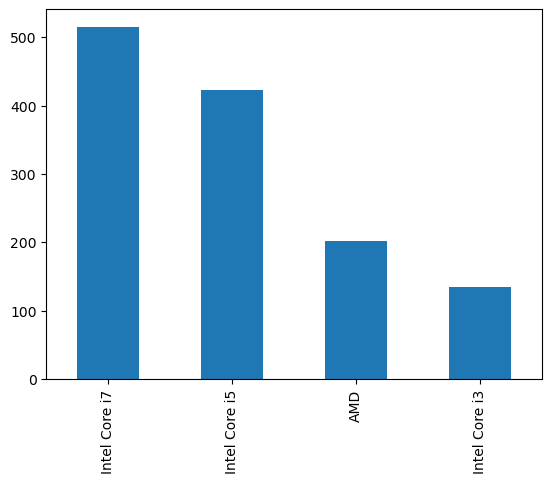

In [645]:
data['Cpu Name'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu Name', ylabel='Price'>

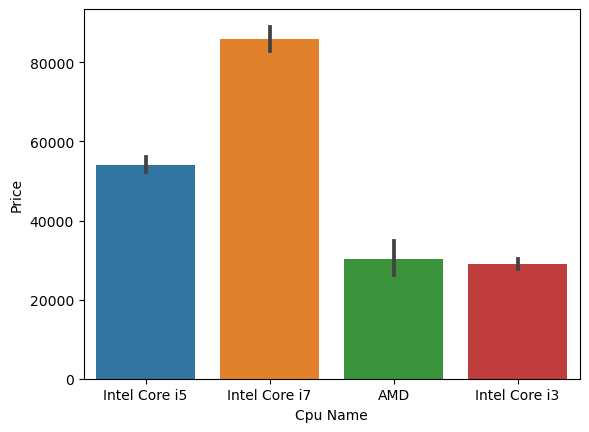

In [646]:
sns.barplot(y = data['Price'],x = data['Cpu Name'])

In [647]:
def fetch_cpu_speed(x):
    if 'GHz' in x.split()[-1]:
        return (x.split()[-1].split('GHz')[0])
    else:
        return np.nan

In [648]:
# extracting digit from cpu speed

data['Cpu Speed'] = data['Cpu'].apply(lambda x: fetch_cpu_speed(x))
data['Cpu Speed'] = data['Cpu Speed'].astype(float)

In [649]:
data['Cpu Speed'].isna().sum()

0

In [650]:
data.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'IPS', 'PPI', 'Cpu Name', 'Cpu Speed'],
      dtype='object')

In [651]:
data.drop('Cpu', axis=1, inplace=True)

<Axes: >

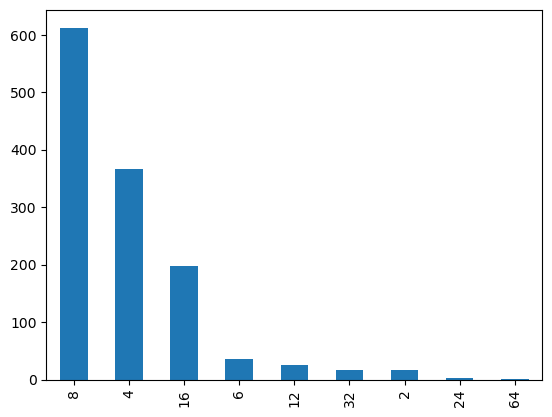

In [652]:
data['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

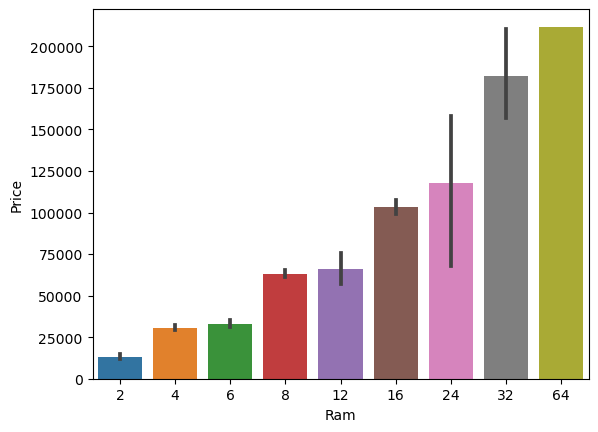

In [653]:
sns.barplot(y = data['Price'],x = data['Ram'])

Linear Relation of RAM with Price

In [654]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1


In [655]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [656]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

In [657]:
new.sample(20)

,0,1
145,256 SSD,None
783,1000 HDD,None
174,256 SSD,None
247,256 SSD,None
1005,256 SSD,None
868,256 SSD,None
1090,500 HDD,None
193,256 SSD,None
1160,256 SSD,None
321,1000 HDD,None


In [658]:
data["first"]= new[0]
data["first"]=data["first"].str.strip()

In [659]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,256 SSD


In [660]:
data["second"]= new[1]

In [661]:
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [662]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,256 SSD,None,0,1,0,0


In [663]:
data['first'] = data['first'].str.replace(r'\D', '')

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\1855225883.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')


In [664]:
data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [665]:
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [666]:
data['second'] = data['second'].str.replace(r'\D', '')

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\268479233.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [667]:
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

In [668]:
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

In [669]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [670]:
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [671]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,0,0


In [672]:
data.drop(columns=['Memory'],inplace=True)

In [673]:
data.corr()['Price']

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
PPI              0.469539
Cpu Speed        0.428178
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

Very less effect of Hybrid or Flash Storage hence we remove it

In [674]:
data.columns
data.drop(columns=['Hybrid','Flash_Storage'] , inplace=True)
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256


In [675]:
data['Gpu'].str.split().str[0].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [676]:
data['Gpu Brand'] = data['Gpu'].str.split().str[0]

In [677]:

data = data[data['Gpu Brand'] != 'ARM']

In [678]:
data[data['Gpu Brand'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,HDD,SSD,Gpu Brand


<Axes: xlabel='Gpu Brand', ylabel='Price'>

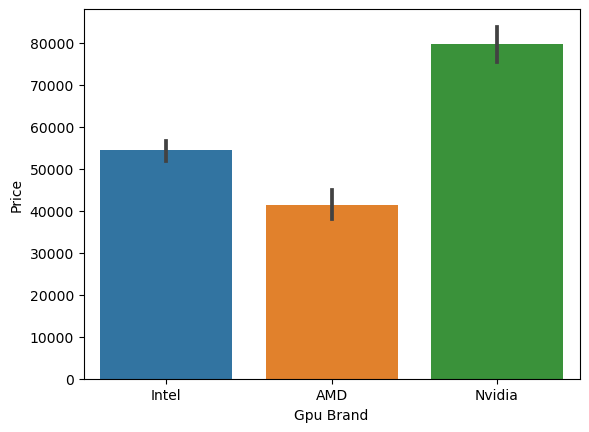

In [679]:
sns.barplot(y = data['Price'],x = data['Gpu Brand'])

In [680]:
data.drop(columns=['Gpu'],inplace=True)

In [681]:
data['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

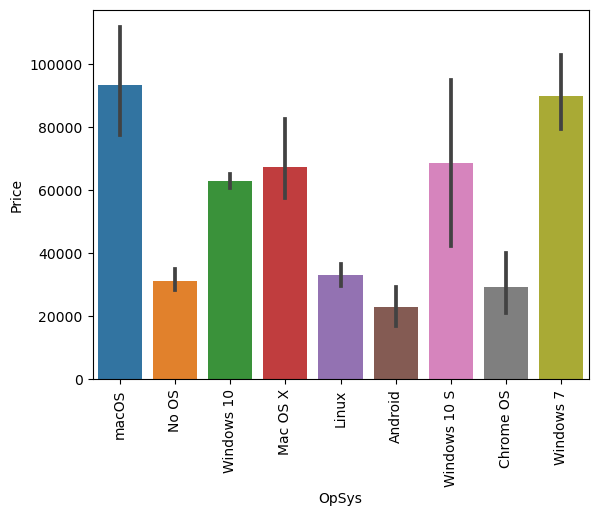

In [682]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [683]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

<Axes: >

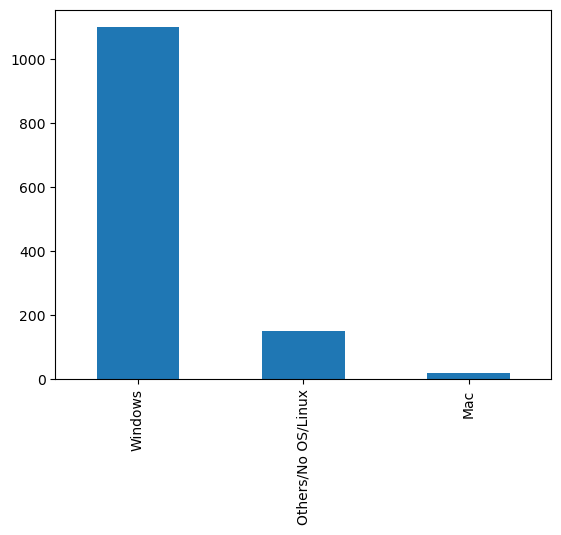

In [684]:
data['OpSys'] = data['OpSys'].apply(lambda x: cat_os(x))
data['OpSys'].value_counts().plot(kind='bar')

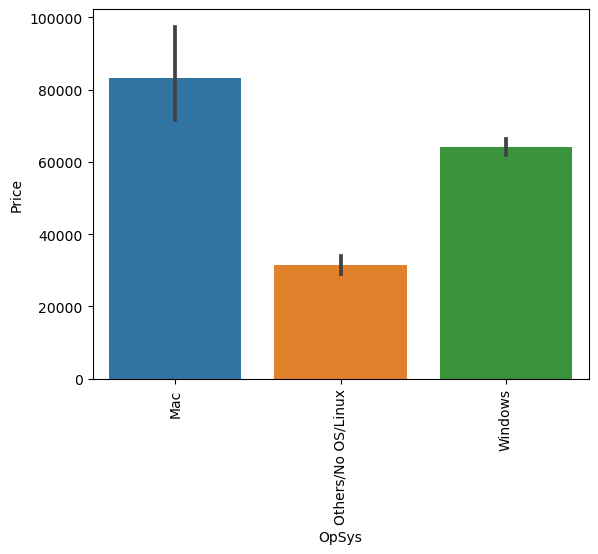

In [685]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [686]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,3.1,0,256,Intel


C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\1424251610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


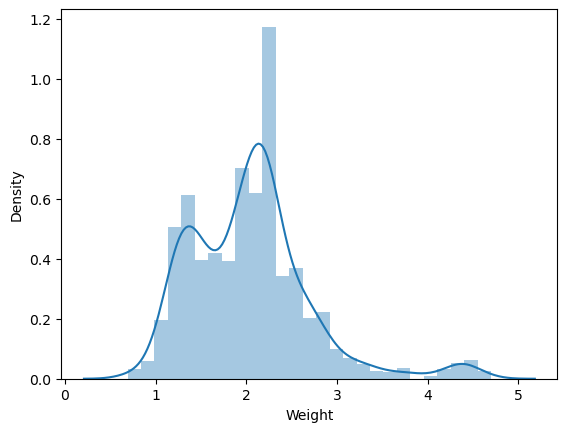

In [687]:
sns.distplot(data['Weight'])
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

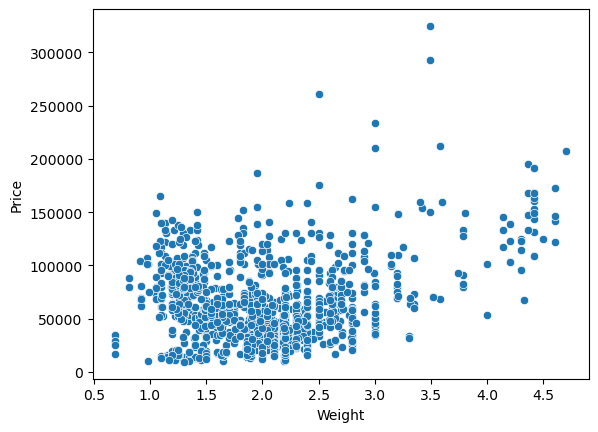

In [688]:
sns.scatterplot(x = data['Weight'], y = data['Price'])

In [689]:
data.corr()['Price']

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
IPS            0.251514
PPI            0.471481
Cpu Speed      0.427994
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\3518276529.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

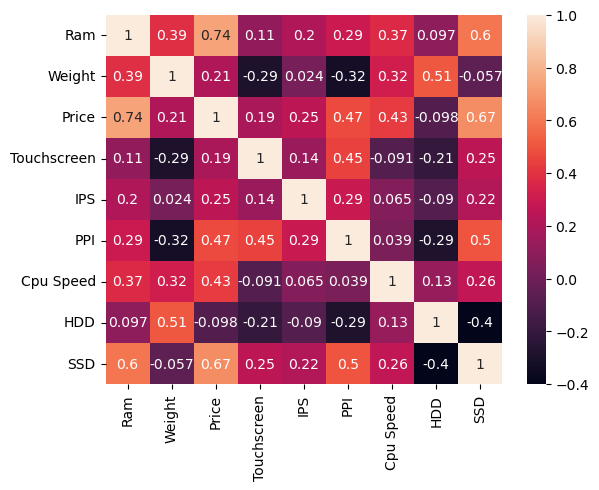

In [690]:
# Let's see relation among all the features
sns.heatmap(data.corr(), annot=True)

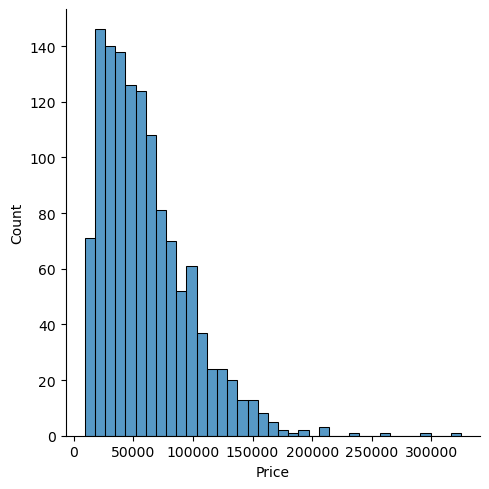

In [691]:
sns.displot(data['Price'])

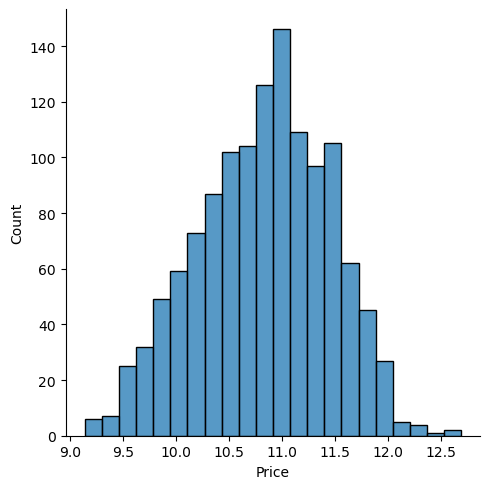

In [692]:
sns.displot(np.log(data['Price']))

The above price function becomes somewhat symmetric if we use log(price)

In [799]:
Y = np.log(data['Price'])
X = data.drop(columns=['Price'])

In [715]:
X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,3.1,0,256,Intel


In [696]:
Y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [697]:
# X = X.drop(columns=['Cpu Speed'])

In [800]:
# use column transformer and one hot encoder to encode categorical features which are columns 0,1,3,8,12
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse_output = False, drop ='first'), [0,1,3,8,12])], remainder='passthrough')
# drop='first' to avoid dummy variable trap which causes multicollinearity issue


In [801]:
X = columnTransformer.fit_transform(X)

In [766]:
X.shape

(1273, 38)

In [802]:
# use standard scaler to scale all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# spliting the data into train, test and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.15)


In [701]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [721]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [703]:
# using linear regression model

lr = LinearRegression()
lr.fit(X_train, Y_train)

# predicting the test set results
Y_pred = lr.predict(X_test)

# calculating the r squared error

score = r2_score(Y_test, Y_pred)
print(score)

0.817487264712216


In [704]:
# using polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, Y_train)

# predicting the test set results
Y_pred = model.predict(poly_reg.fit_transform(X_test))

# calculating the r squared error
score = r2_score(Y_test, Y_pred)
print(score)

-5626266971.351687


In [705]:
model = DecisionTreeRegressor(max_depth = 9, min_samples_leaf=9, random_state=0)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)
print(score)

0.8335435746063468


In [706]:
model = RandomForestRegressor(n_estimators = 100, random_state=0)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8772411108595831


In [707]:

model = GradientBoostingRegressor(n_estimators = 100, random_state=0)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8690391215842329


In [708]:

from sklearn.svm import SVR
model = SVR(kernel='rbf',C=10000,epsilon=0.1)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8384874924230677


In [709]:

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)


0.7797014308068665


In [710]:

from sklearn.linear_model import Ridge
model = Ridge(alpha=7)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8155960087814795


In [803]:
# XgBoost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.885371740094616


In [783]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=100, learning_rate=0.05)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

R2 score 0.8792536532517107
MAE 0.16486937350593495


In [804]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

# Trying to improve accuracy

In [400]:
data.corr()['Price']

C:\Users\ranja\AppData\Local\Temp\ipykernel_14552\736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
IPS            0.251514
PPI            0.471481
Cpu Speed      0.427994
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

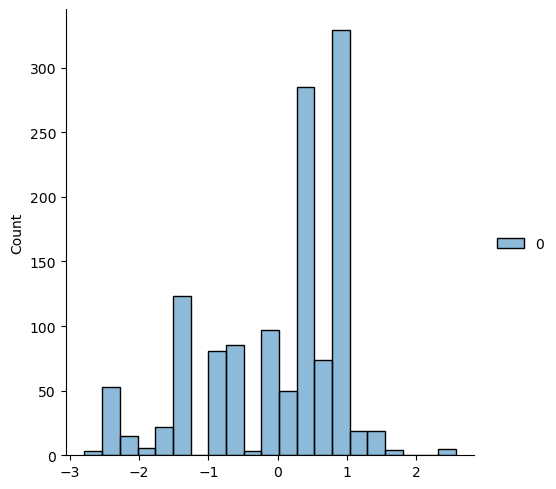

In [419]:
# scaled_weight = data[['Weight']]
# scaled_weight = scaler.fit_transform(scaled_weight)
# sns.displot(scaled_weight)
# sns.displot(data['Weight'])
sns.displot(scaler.fit_transform(data[['Cpu Speed']]))

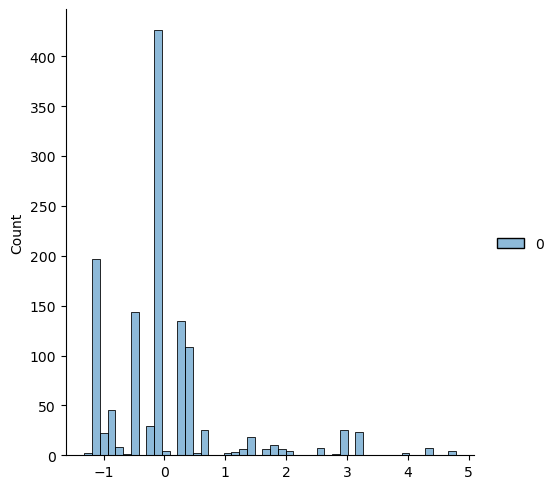

In [422]:
sns.displot(scaler.fit_transform(data[['PPI']]))

In [443]:
new_data = data.drop(columns=['Price'])

In [444]:
# use standard scaler to scale all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data[['Weight','Cpu Speed','PPI']] = scaler.fit_transform(new_data[['Weight','Cpu Speed','PPI']])

In [445]:
new_data.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu Name,Cpu Speed,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac,-1.003171,0,1,1.865121,AMD,-0.007488,0,128,Intel
1,Apple,Ultrabook,8,Mac,-1.048016,0,0,-0.449147,AMD,-1.000366,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,-0.270711,0,0,-0.133741,AMD,0.389664,0,256,Intel
3,Apple,Ultrabook,16,Mac,-0.315556,0,1,1.714844,AMD,0.786816,0,512,AMD
4,Apple,Ultrabook,8,Mac,-1.003171,0,1,1.865121,AMD,1.581119,0,256,Intel


In [446]:
# use column transformer and one hot encoder to encode categorical features which are columns 0,1,3,8,12
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse_output = False, drop ='first'), [0,1,3,8,12])], remainder='passthrough')
# drop='first' to avoid dummy variable trap which causes multicollinearity issue


In [447]:
new_data = columnTransformer.fit_transform(new_data)

In [448]:
# spliting the data into train, test and validation set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(new_data, Y, random_state=0, test_size=0.15)

In [451]:
model = RandomForestRegressor(n_estimators = 100, random_state=0)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8673281480064566


In [452]:
model = GradientBoostingRegressor(n_estimators = 100, random_state=0)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8596883392963579


In [453]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

score = r2_score(Y_test, Y_pred)

print(score)

0.8857970990526322
